In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("MonthlyEmails.xlsx") 
df

,Year,Week,Agent Name,Disposition,Answered
0,2023,Week 1,Agent 1,EmailDiscard,3
1,2023,Week 1,Agent 1,EmailReplied,49
2,2023,Week 1,Agent 1,EmailRequeue,64
3,2023,Week 1,Agent 2,EmailDiscard,131
4,2023,Week 1,Agent 2,EmailReplied,16
...,...,...,...,...,...
100,2023,Week 5,Agent 6,EmailReplied,5
101,2023,Week 5,Agent 6,EmailRequeue,61
102,2023,Week 5,Agent 7,EmailDiscard,18
103,2023,Week 5,Agent 7,EmailReplied,127


In [3]:
def data_cleaning(df):
    df['Disposition'] = (df['Disposition'].str.split('Email')).str.get(1)
    df['Week'] = (df['Week'].str.split(' ')).str.get(1)
    return df

In [4]:
df = data_cleaning(df)
df

,Year,Week,Agent Name,Disposition,Answered
0,2023,1,Agent 1,Discard,3
1,2023,1,Agent 1,Replied,49
2,2023,1,Agent 1,Requeue,64
3,2023,1,Agent 2,Discard,131
4,2023,1,Agent 2,Replied,16
...,...,...,...,...,...
100,2023,5,Agent 6,Replied,5
101,2023,5,Agent 6,Requeue,61
102,2023,5,Agent 7,Discard,18
103,2023,5,Agent 7,Replied,127


In [6]:
def rep_req_ratio_agent(df):
    fig, ax = plt.subplots(1, figsize=(10,5))
    names = set(df["Agent Name"])
    
    for i in names:
        
        agent = df[df["Agent Name"] == i]
        Replied = agent[agent["Disposition"] == "Replied"]
        Requeued = agent[agent["Disposition"] == "Requeue"]
        Replied = Replied["Answered"].sum()
        Requeued = Requeued["Answered"].sum()
        Ratio = round((Requeued/(Replied + Requeued))*100)
        x = i +" (" + str(Ratio) +"%)"
        ax.barh(x,Ratio)
    ax.set(title = "Requeued Ratio", ylabel = "Agent Name", xlabel = "Ratio (%)")

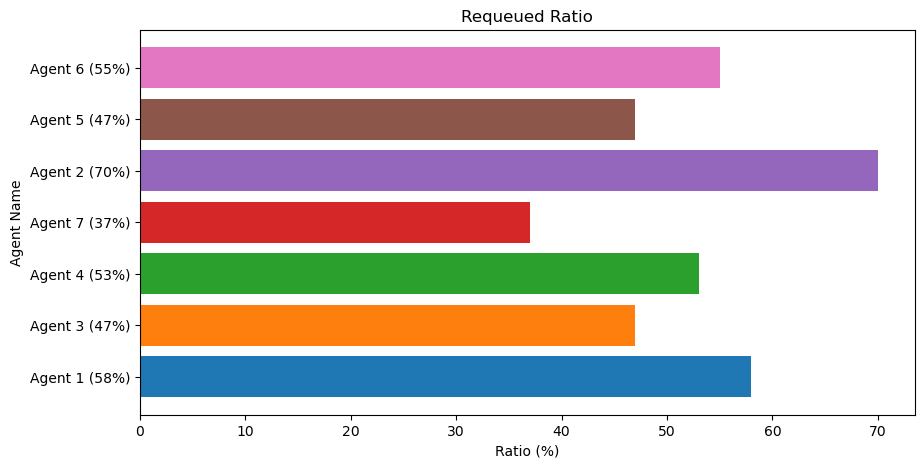

In [7]:
rep_req_ratio_agent(df)